In [1]:
import sys
print(sys.version_info)

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

sys.version_info(major=3, minor=11, micro=10, releaselevel='final', serial=0)



# DEFUZZICATION

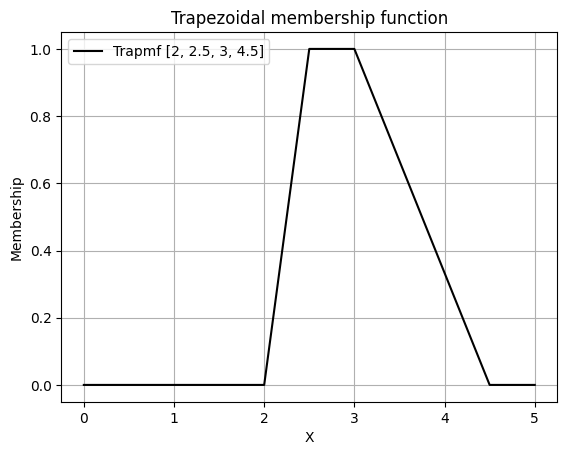

In [2]:
# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

plt.figure()
plt.plot(x, mfx, 'k', linewidth=1.5, label='Trapmf [2, 2.5, 3, 4.5]')
plt.title('Trapezoidal membership function')
plt.ylabel('Membership')
plt.xlabel('X')
plt.legend(loc='best')
plt.grid(True)
plt.show()

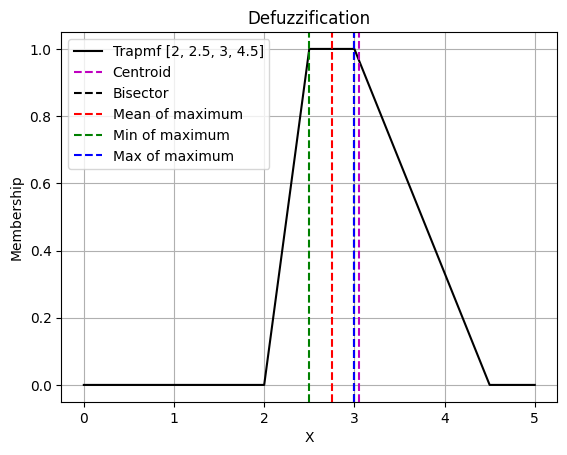

In [3]:
# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid()
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

plt.figure()
plt.plot(x, mfx, 'k', linewidth=1.5, label='Trapmf [2, 2.5, 3, 4.5]')
plt.axvline(defuzz_centroid, color='m', linestyle='--', linewidth=1.5)
plt.axvline(defuzz_bisector, color='k', linestyle='--', linewidth=1.5)
plt.axvline(defuzz_mom, color='r', linestyle='--', linewidth=1.5)
plt.axvline(defuzz_som, color='g', linestyle='--', linewidth=1.5)
plt.axvline(defuzz_lom, color='b', linestyle='--', linewidth=1.5)
plt.title('Defuzzification')
plt.ylabel('Membership')
plt.xlabel('X')
plt.legend(['Trapmf [2, 2.5, 3, 4.5]', 'Centroid', 'Bisector', 'Mean of maximum', 'Min of maximum', 'Max of maximum'], loc='best')
plt.grid(True)
plt.show()

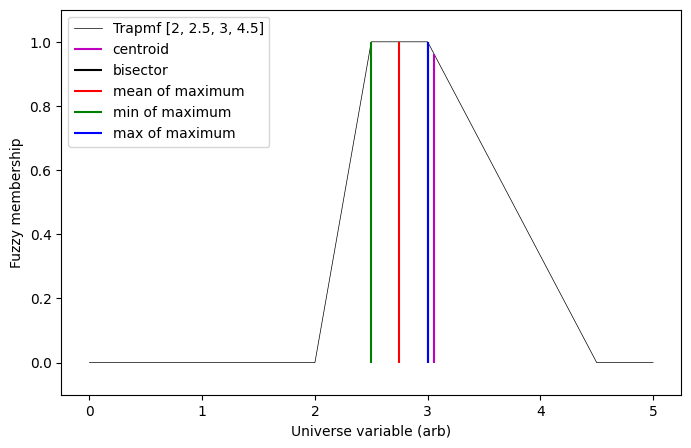

In [4]:
# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['m', 'k', 'r', 'g', 'b']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k', linewidth=0.5, label='Trapmf [2, 2.5, 3, 4.5]')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()